**Imports**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import requests
import os
from google.colab import userdata

**hiding API key**

In [7]:
tng_api_key = userdata.get('TNG_API_KEY')
baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":tng_api_key}

In [8]:
def get(path, params=None):
    headers = {"api-key":tng_api_key}
    r = requests.get(path, params=params, headers=headers)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers: #not only json
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [9]:
r = get(baseUrl)
r.keys()

dict_keys(['simulations'])

In [10]:
r['simulations'][0]

{'name': 'Illustris-1',
 'num_snapshots': 134,
 'url': 'http://www.tng-project.org/api/Illustris-1/'}

In [11]:
for simulation in r['simulations']: #only get TNG50
    if simulation['name'] == 'TNG50-1':
        url = simulation['url']
        break

In [12]:
tng50 = get(url)
tng50.keys()

dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [13]:
url = 'http://www.tng-project.org/api/TNG50-1/snapshots/z=1.8/' #find the snapshot
snapshot = get(url)
snapshot['number'], snapshot['redshift']

(35, 1.82268925262035)

In [14]:
sub_url = f"http://www.tng-project.org/api/TNG50-1/snapshots/{snapshot['number']}/subhalos/0/" #put in 0 because I don't know the actual subhalo
subhalo = get(sub_url)
subhalo.keys() #keep in mind to look into "bhmdot" and "sfr" for future research

dict_keys(['snap', 'id', 'bhmdot', 'cm_x', 'cm_y', 'cm_z', 'gasmetallicity', 'gasmetallicityhalfrad', 'gasmetallicitymaxrad', 'gasmetallicitysfr', 'gasmetallicitysfrweighted', 'pos_x', 'pos_y', 'pos_z', 'halfmassrad', 'halfmassrad_gas', 'halfmassrad_dm', 'halfmassrad_stars', 'halfmassrad_bhs', 'len', 'len_gas', 'len_dm', 'len_stars', 'len_bhs', 'mass', 'mass_gas', 'mass_dm', 'mass_stars', 'mass_bhs', 'massinhalfrad', 'massinhalfrad_gas', 'massinhalfrad_dm', 'massinhalfrad_stars', 'massinhalfrad_bhs', 'massinmaxrad', 'massinmaxrad_gas', 'massinmaxrad_dm', 'massinmaxrad_stars', 'massinmaxrad_bhs', 'massinrad', 'massinrad_gas', 'massinrad_dm', 'massinrad_stars', 'massinrad_bhs', 'sfr', 'sfrinhalfrad', 'sfrinmaxrad', 'sfrinrad', 'spin_x', 'spin_y', 'spin_z', 'starmetallicity', 'starmetallicityhalfrad', 'starmetallicitymaxrad', 'stellarphotometrics_u', 'stellarphotometrics_b', 'stellarphotometrics_v', 'stellarphotometrics_k', 'stellarphotometrics_g', 'stellarphotometrics_r', 'stellarphotome

In [15]:
subhalo['vis'] #to get projections of each subhalo

{'mergertree_sublink': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/sublink/tree.png',
 'halo_gas_dens': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=gas',
 'halo_gas_temp': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=gas&partField=temp',
 'halo_dm_dens': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=dm',
 'halo_stellar_dens': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=stars',
 'galaxy_gas_dens': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=gas&size=5.0&sizeType=rHalfMassStars',
 'galaxy_gas_dens_faceon': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=gas&size=5.0&sizeType=rHalfMassStars&rotation=face-on',
 'galaxy_stellar_light': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=stars&partField=stellarComp-jwst_f200w-jwst_f

In [17]:
vis_query = "partType=gas&partField=temp" #in this case looking at temperature

In [19]:
vis_url = f"http://www.tng-project.org/api/TNG50-1/snapshots/snapshots/snap{['number']}/subhalos/0/vis.png?{vis_query}"
vis_r = get(sub_url)

In [20]:
vis_r.keys()

dict_keys(['snap', 'id', 'bhmdot', 'cm_x', 'cm_y', 'cm_z', 'gasmetallicity', 'gasmetallicityhalfrad', 'gasmetallicitymaxrad', 'gasmetallicitysfr', 'gasmetallicitysfrweighted', 'pos_x', 'pos_y', 'pos_z', 'halfmassrad', 'halfmassrad_gas', 'halfmassrad_dm', 'halfmassrad_stars', 'halfmassrad_bhs', 'len', 'len_gas', 'len_dm', 'len_stars', 'len_bhs', 'mass', 'mass_gas', 'mass_dm', 'mass_stars', 'mass_bhs', 'massinhalfrad', 'massinhalfrad_gas', 'massinhalfrad_dm', 'massinhalfrad_stars', 'massinhalfrad_bhs', 'massinmaxrad', 'massinmaxrad_gas', 'massinmaxrad_dm', 'massinmaxrad_stars', 'massinmaxrad_bhs', 'massinrad', 'massinrad_gas', 'massinrad_dm', 'massinrad_stars', 'massinrad_bhs', 'sfr', 'sfrinhalfrad', 'sfrinmaxrad', 'sfrinrad', 'spin_x', 'spin_y', 'spin_z', 'starmetallicity', 'starmetallicityhalfrad', 'starmetallicitymaxrad', 'stellarphotometrics_u', 'stellarphotometrics_b', 'stellarphotometrics_v', 'stellarphotometrics_k', 'stellarphotometrics_g', 'stellarphotometrics_r', 'stellarphotome

In [21]:
vis_r['vis']

{'mergertree_sublink': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/sublink/tree.png',
 'halo_gas_dens': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=gas',
 'halo_gas_temp': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=gas&partField=temp',
 'halo_dm_dens': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=dm',
 'halo_stellar_dens': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=stars',
 'galaxy_gas_dens': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=gas&size=5.0&sizeType=rHalfMassStars',
 'galaxy_gas_dens_faceon': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=gas&size=5.0&sizeType=rHalfMassStars&rotation=face-on',
 'galaxy_stellar_light': 'http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?partType=stars&partField=stellarComp-jwst_f200w-jwst_f

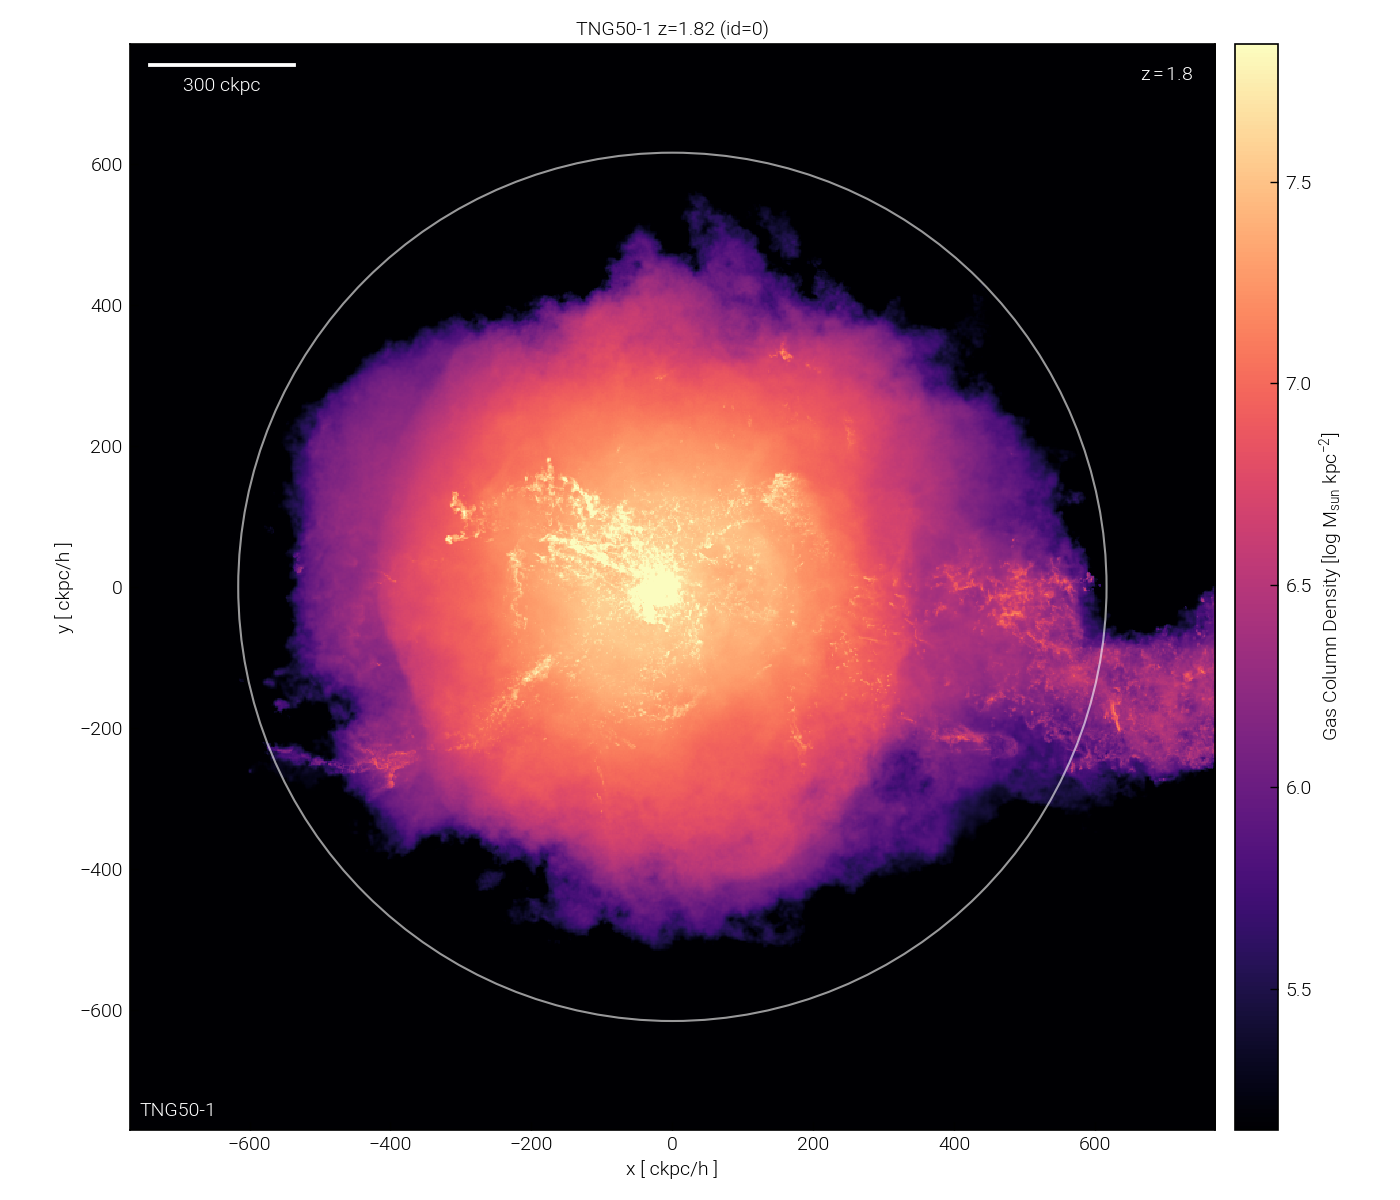

In [26]:
from IPython.display import Image
img_url1 = vis_r['vis']['halo_gas_dens'] #getting the url for halo density
img_filename1 = get(img_url1)
display(Image(filename=img_filename1)) #showing the image

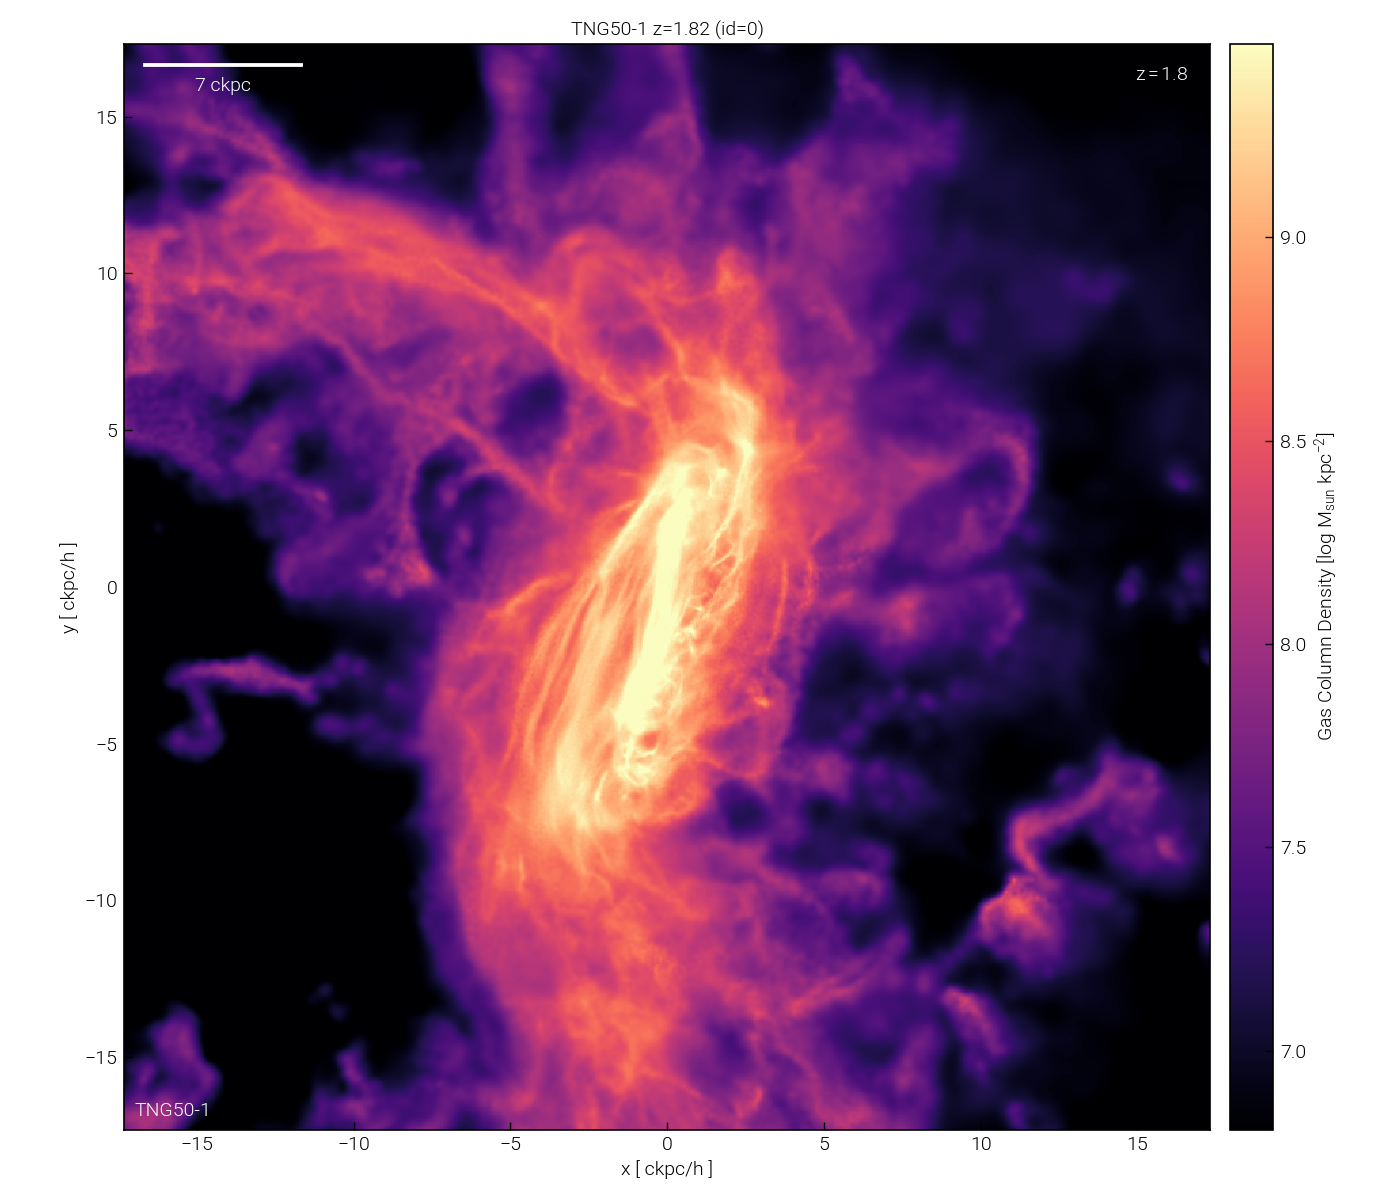

In [30]:
from IPython.display import Image
img_url2 = vis_r['vis']['galaxy_gas_dens'] #getting the url for galaxy gas density
img_filename2 = get(img_url2)
display(Image(filename=img_filename2)) #showing the image

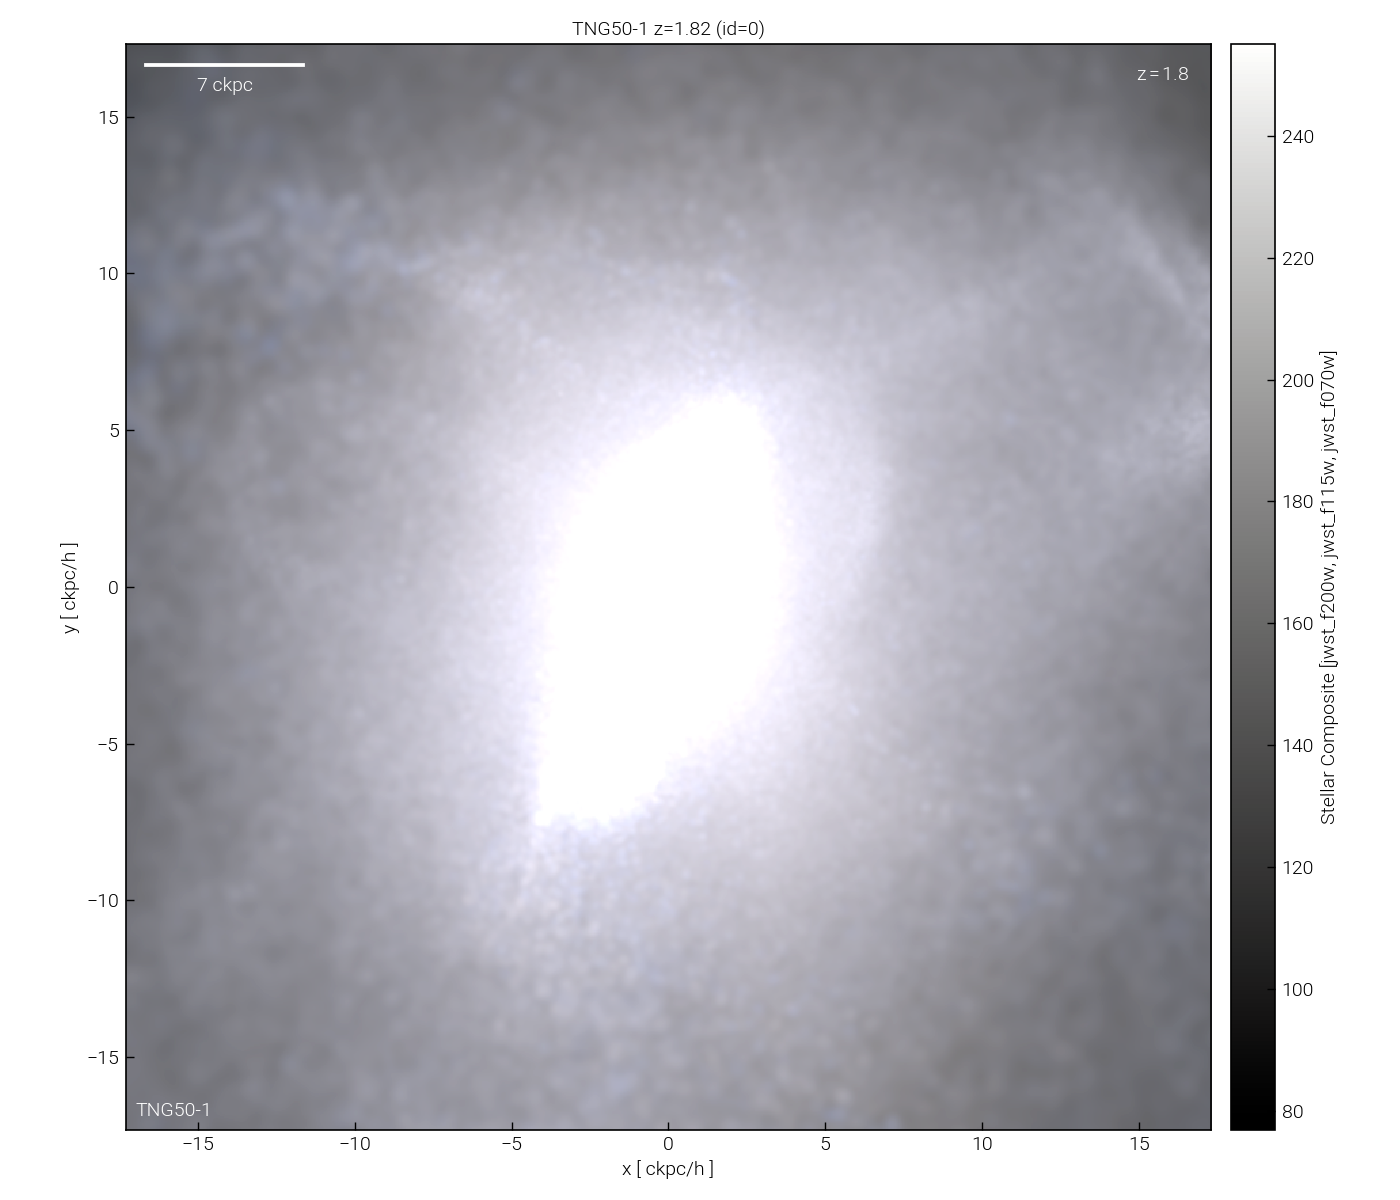

In [32]:
from IPython.display import Image
img_url3 = vis_r['vis']['galaxy_stellar_light'] #getting the url for galaxy stellar light
img_filename3 = get(img_url3)
display(Image(filename=img_filename3)) #showing the image